# Nonzero
Here we compare performance of [`nonzero`](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html#numpy.nonzero) implemented in [numpy](https://numpy.org) and clEsperanto.

**Note:** benchmarking results vary heavily depending on image size, kernel size, used operations, parameters and used hardware. Use this notebook to adapt it to your use-case scenario and benchmark on your target hardware. If you have different scenarios or use-cases, you are very welcome to submit your notebook as pull-request!

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
import timeit

# to measure kernel execution duration properly, we need to set this flag. It will slow down exection of workflows a bit though
cle.set_wait_for_kernel_finish(True)

# selet a GPU with the following in the name. This will fallback to any other GPU if none with this name is found
cle.select_device('RTX')

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

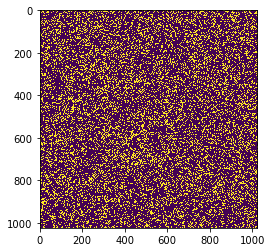

In [2]:
image = np.random.random((1024, 1024)) > 0.75
cle.imshow(image)

In [3]:
type(image), image.shape

(numpy.ndarray, (1024, 1024))

In [4]:
cl_image = cle.push(image)

type(cl_image), cl_image.shape

(pyclesperanto_prototype._tier0._pycl.OCLArray, (1024, 1024))

In [5]:
def numpy_nonzero():
    return np.nonzero(image)

In [6]:
def cle_nonzero():
    return cle.spots_to_pointlist(cl_image)

In [7]:
%timeit numpy_nonzero()

6.18 ms ± 133 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
%timeit cle_nonzero()

34.2 ms ± 277 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
